In [1]:
#Assignment no. 5- Write a Program to implement Decision Tree for Regression.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:>

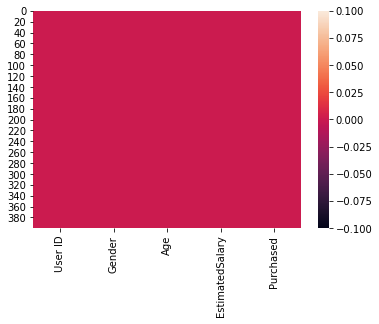

In [6]:
sns.heatmap(dataset.isnull())

In [7]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
dataset.drop(['Gender','User ID'], axis=1, inplace=True)

<AxesSubplot:>

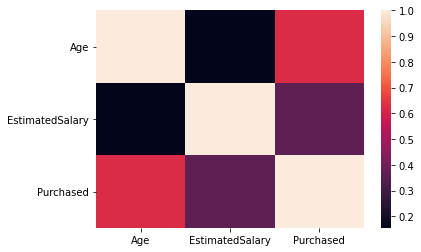

In [9]:
sns.heatmap(dataset.corr())

<AxesSubplot:>

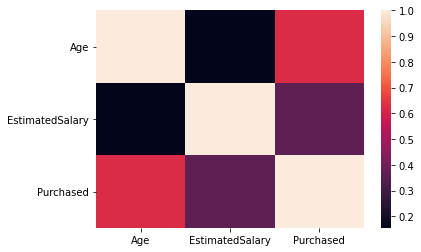

In [10]:
import seaborn as sns
%matplotlib inline
sns.heatmap(dataset.corr())

In [11]:
dataset.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(dataset.drop('Purchased',axis=1))

StandardScaler()

In [15]:
scaled_features = scaler.transform(dataset.drop('Purchased',axis=1))

In [16]:
df_feat = pd.DataFrame(scaled_features,columns=['Age', 'EstimatedSalary'])
df_feat.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [17]:
# TRAIN, TEST SPLIT
from sklearn.model_selection import train_test_split
X=df_feat
y=dataset['Purchased']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [19]:
#Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor
Rdt_model = DecisionTreeRegressor()
Rdt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [20]:
Rdt_pred = Rdt_model.predict(X_test)

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, Rdt_pred))
print('MSE:', metrics.mean_squared_error(y_test, Rdt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Rdt_pred)))

MAE: 0.11666666666666667
MSE: 0.11666666666666667
RMSE: 0.3415650255319866


In [22]:
#Conclusion - We successfully implement Decision Tree for Regression.